In [0]:
import tensorflow as tf

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [0]:
x_train = np.expand_dims(x_train, -1) #necesito agregar 1 dimension para poder hacer convd2 (la convolucion es de 2 dimensiones, no el input)
x_test = np.expand_dims(x_test, -1)

In [0]:
K = len(set(y_train))

In [0]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i) #stride 2 -> dimension se divide por 2
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x) #Regularisacion, pero despues de conv solamente. Si regularizo pierdo patterns que es lo que quiero buscar con conv
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [15]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5305 - accuracy: 0.8038 - val_loss: 0.4114 - val_accuracy: 0.8498
Epoch 2/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3644 - accuracy: 0.8637 - val_loss: 0.3506 - val_accuracy: 0.8691
Epoch 3/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.8818 - val_loss: 0.3120 - val_accuracy: 0.8855
Epoch 4/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2808 - accuracy: 0.8941 - val_loss: 0.2994 - val_accuracy: 0.8884
Epoch 5/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2548 - accuracy: 0.9041 - val_loss: 0.2968 - val_accuracy: 0.8921
Epoch 6/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2338 - accuracy: 0.9113 - val_loss: 0.2875 - val_accuracy: 0.8956
Epoch 7/15
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152 - accuracy: 0.9178 - val_loss: 0.2911 - val_accuracy:

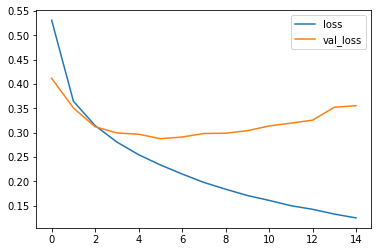

In [16]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend() #parece haber bastante overfitting

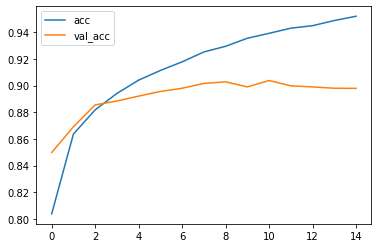

In [17]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[871   1  18  17   6   0  81   0   6   0]
 [  4 975   0  12   3   0   4   0   2   0]
 [ 23   0 857   6  48   0  65   0   1   0]
 [ 24   7  28 894  30   2  15   0   0   0]
 [  2   1  72  14 832   0  78   0   1   0]
 [  0   0   0   1   0 970   0  21   0   8]
 [137   0  70  23  87   0 674   0   9   0]
 [  0   0   0   0   0   7   0 967   0  26]
 [  2   0   7   1   5   1   5   2 975   2]
 [  1   0   0   0   0   4   0  31   0 964]]


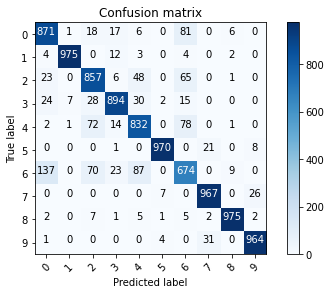

In [18]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

#se confunde bastante tops con remeras pero me parece coherente. lo mismo con abrigos.
#estoy conforme con el accuracy, de todas maneras voy a investigar un poco mas en parameter tuning.